# Task 1: Exploration of Customer Purchasing Behavior

Exploratory data analysis (EDA) helps us unravel the nature of the data and sometimes informs how we approach modeling. In this task, we will explore customer behavior, focusing on features like promotions, holidays, seasonality, and competitor distance, which affect sales. 

We will clean the data, handle missing values, detect outliers, and visualize various features to gain insights.

---

### Step 1: Data Cleaning
We start by building a pipeline to handle missing data and detect outliers. This ensures that our analysis is not skewed by inconsistent data.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from scripts.Data_preprocessing_pipeline import DataPreprocessingPipeline

In [3]:
# Data loading our data is in CSV format
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
store = pd.read_csv('../data/store.csv')

In [4]:
from scripts.customer_behavior_EDA import CustomerBehaviorAnalyzer
df=pd.DataFrame()
cba=CustomerBehaviorAnalyzer(df)

In [5]:
# Merges the train and test data with the store data on the store column
merge_train_df, merge_test_df = cba.merge_data(train, test, store)

2025-01-03 20:55:01 - INFO - Merging train and test data with store data


In [6]:
# print some training data after merging is conducted
merge_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
# print some test data after mergeing
merge_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


##### Change the 'Date' format in a proper datetime format

In [8]:
# Converts 'Date' columns to datetime format for time-based analysis.
merge_train_df['Date'] = pd.to_datetime(merge_train_df['Date'])
merge_test_df['Date'] = pd.to_datetime(merge_test_df['Date'])

In [9]:
# Initializes a data preprocessing pipeline using the merge_train_df

pipeline = DataPreprocessingPipeline(train, test, store)

In [10]:
# Runs the data preprocessing pipeline on the merge_train_df DataFrame, 
# applying the specified strategies for handling missing values and outliers and store on cleand df
cleaned_df = pipeline.run_pipeline(missing_num_strategy='mean', missing_cat_strategy='mode', outlier_method='zscore')
cleaned_df

2025-01-03 20:55:02 - INFO - Running the complete preprocessing pipeline.
2025-01-03 20:55:02 - INFO - Running preprocessing on both train and test datasets.
2025-01-03 20:55:02 - INFO - Merging store data with train and test datasets.
2025-01-03 20:55:02 - INFO - Adding date features.
2025-01-03 20:55:03 - INFO - Handling missing data
2025-01-03 20:55:03 - INFO - Missing values per column:
Store                        0.000000
DayOfWeek                    0.000000
Date                         0.000000
Sales                        0.000000
Customers                    0.000000
Open                         0.000000
Promo                        0.000000
SchoolHoliday                0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002597
CompetitionOpenSinceMonth    0.317878
CompetitionOpenSinceYear     0.317878
Promo2                       0.000000
Promo2SinceWeek              0.499436
Promo2SinceYear              0.49943

(         Store  DayOfWeek  Sales  Open  Promo  SchoolHoliday  \
 0            1          5   5263     1      1              1   
 1            2          5   6064     1      1              1   
 2            3          5   8314     1      1              1   
 3            4          5  13995     1      1              1   
 4            5          5   4822     1      1              1   
 ...        ...        ...    ...   ...    ...            ...   
 1017204   1111          2      0     0      0              1   
 1017205   1112          2      0     0      0              1   
 1017206   1113          2      0     0      0              1   
 1017207   1114          2      0     0      0              1   
 1017208   1115          2      0     0      0              1   
 
          CompetitionDistance  CompetitionOpenSinceMonth  \
 0                     1270.0                   9.000000   
 1                      570.0                  11.000000   
 2                    14130.0         

##### Handle missing data

In [11]:
train_cleaned = cba.clean_data(merge_train_df)
test_cleaned = cba.clean_data(merge_test_df)

# # Check for missing values after cleaning
# print("Missing values in train_cleaned:")
# print(train_cleaned.isnull().sum())

# print("Missing values in test_cleaned:")
# print(test_cleaned.isnull().sum())


2025-01-03 20:55:05 - INFO - Cleaning data
2025-01-03 20:55:05 - INFO - Cleaning data


KeyError: "None of [Index(['Sales', 'Customers'], dtype='object')] are in the [columns]"

### Step 2: Explore the Distribution of Promotions in Training vs Test Sets
Let's check if promotions are distributed similarly between the training and test datasets. This is important to ensure that the test set is representative.

2025-01-03 19:47:43 - INFO - Plotting promotion distribution


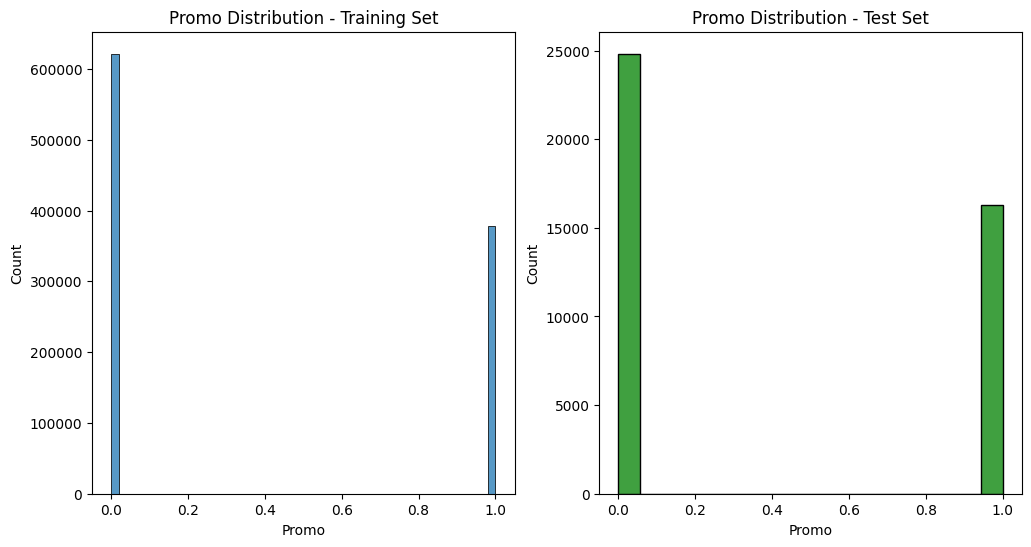

In [14]:
cba.plot_promo_distribution(train_cleaned, merge_test_df)

### Step 3: Sales Behavior Before, During, and After Holidays
We will now explore how sales behave around holidays. This includes checking for spikes or dips in sales before, during, and after holidays.

In [15]:
cba.add_holiday_columns(train_cleaned)

2025-01-03 19:47:47 - INFO - Adding holiday columns...


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,IsHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,0


2025-01-03 19:47:50 - INFO - Plotting sales effects due to holidays...


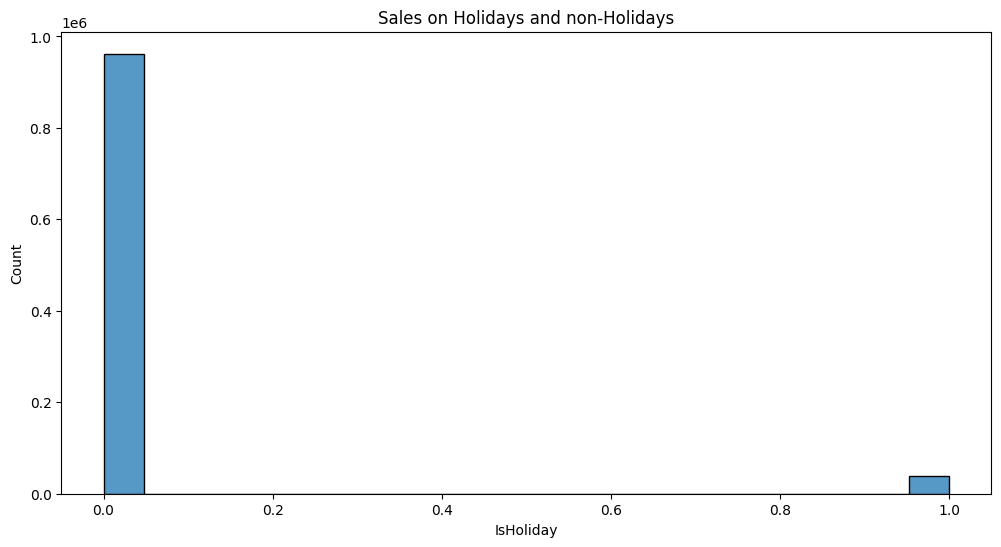

In [16]:
# This function plots sales behavior around holidays using the cleaned training data
cba.plot_sales_holiday_behavior(train_cleaned)

2025-01-03 19:47:54 - INFO - Plotting holiday effects...


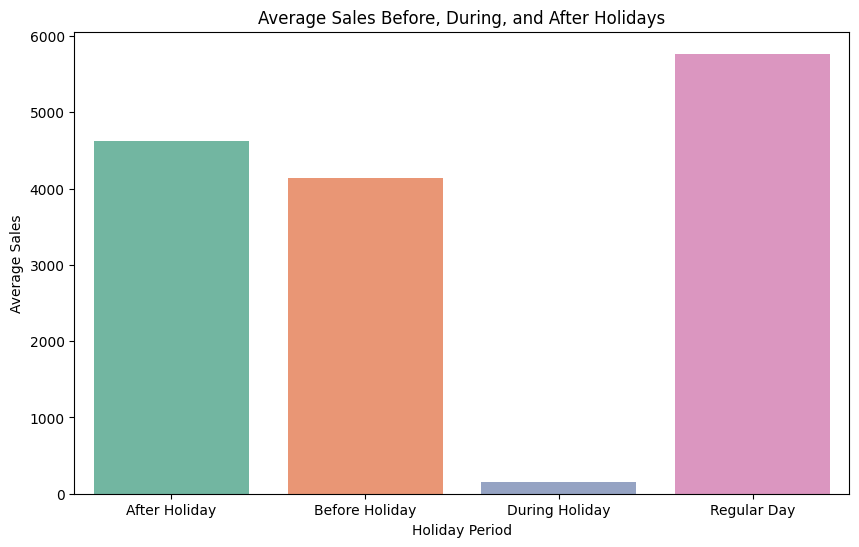

In [17]:
# This function plots the effects of holidays on sales using the cleaned training data
cba.plot_holiday_effects(train_cleaned)

### Step 4: Seasonal Purchase Behavior (e.g., Christmas, Easter)
We now explore how seasonal events, such as Christmas and Easter, affect purchasing behavior.

2025-01-03 19:47:58 - INFO - Plotting sales effects due to holidays...


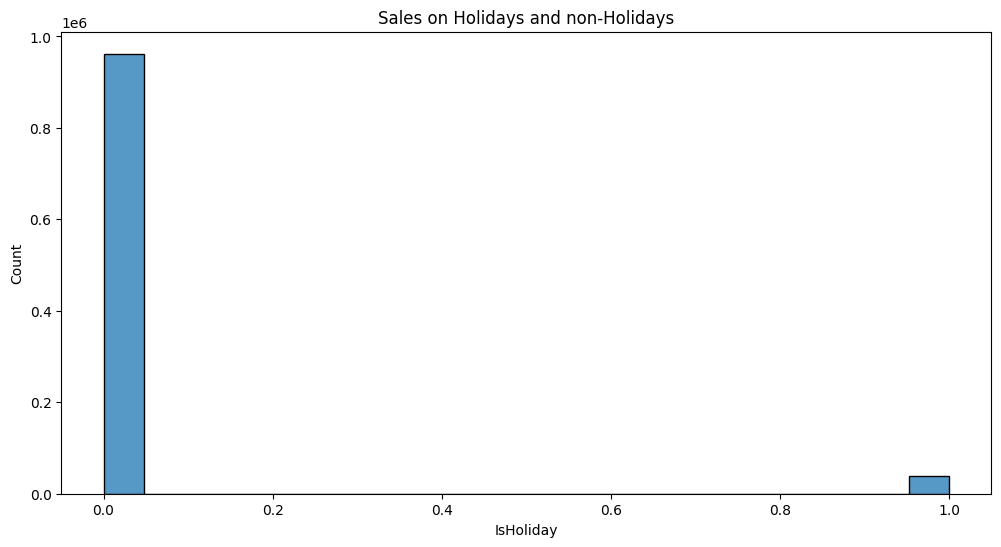

In [18]:
# Call the function with the cleaned training data
cba.plot_sales_holiday_behavior(train_cleaned)

### Step 5: Correlation Between Sales and Number of Customers
Here, we check the correlation between sales and the number of customers.

2025-01-03 19:48:03 - INFO - Calculating correlation between sales and customers...


Correlation between Sales and Customers: 0.8974809248168584


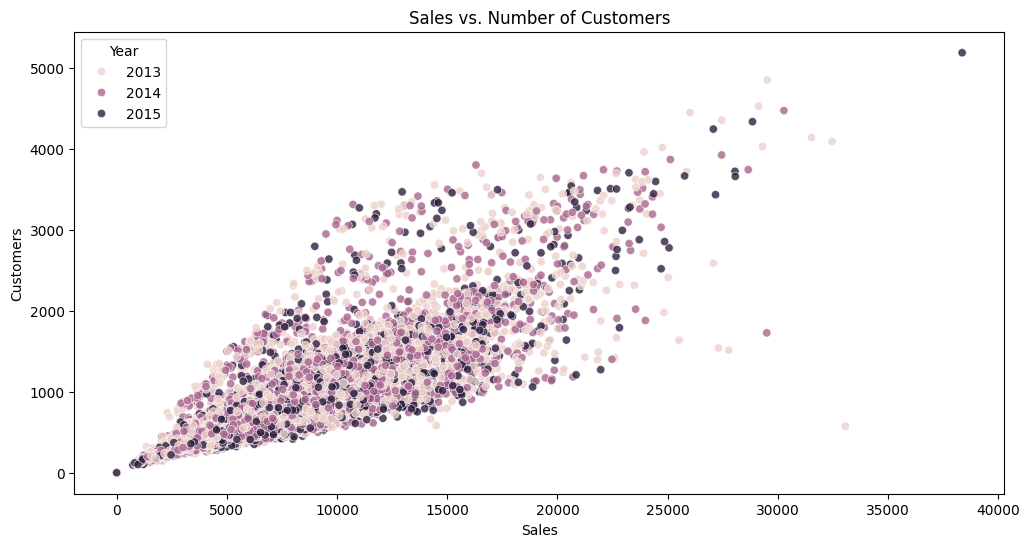

In [19]:
# Take a sample 40000 daata and Correlation analysis and scatter plot
temp_df=merge_train_df.sample(40000)
cba.correlation_sales_customers(temp_df)

### Step 6: Effect of Promotions on Sales
Let's now investigate how promotions affect sales and customer behavior.

2025-01-03 19:50:24 - INFO - Plotting sales effects due to promotions...
2025-01-03 19:50:25 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 19:50:25 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


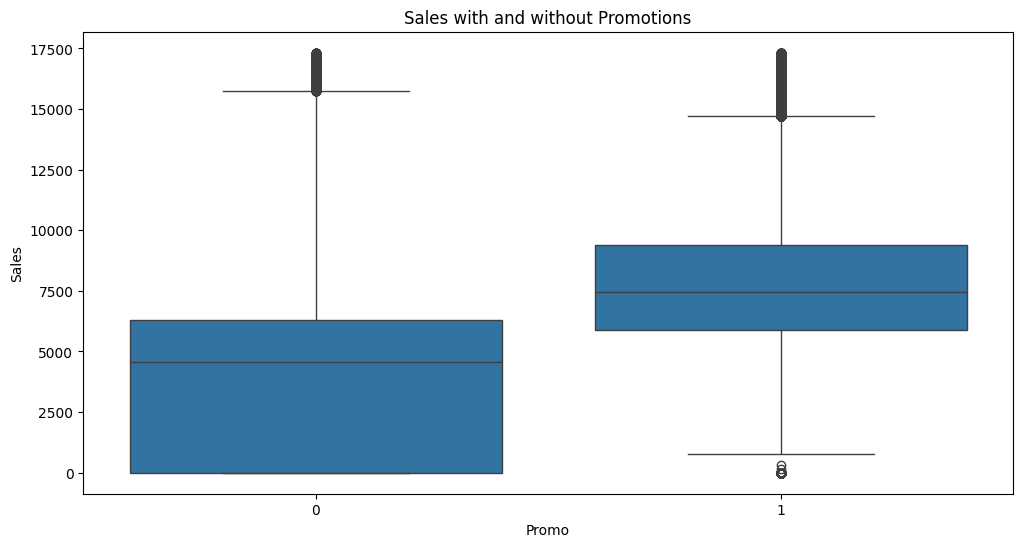

In [12]:
# plot_sales_promo_effect(train_cleaned)
cba.plot_sales_promo_effect(train_cleaned)

2025-01-03 19:57:03 - INFO - Plotting sales effects due to state holidays...


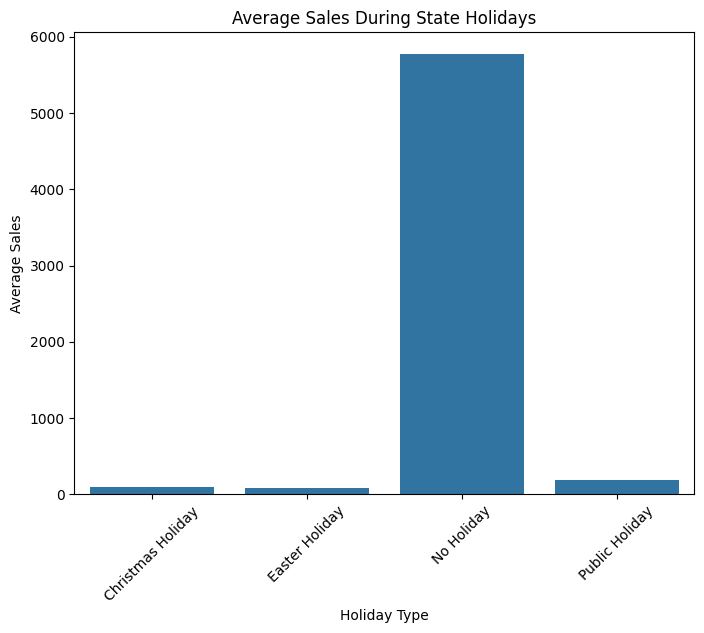

In [23]:
cba.plot_sales_by_state_holiday(train_cleaned)

### Step 7: Customer Behavior During Store Opening and Closing Times
Let's analyze how customers behave during store opening and closing times.

2025-01-03 20:03:13 - INFO - Plotting customer traffic based on store opening status...


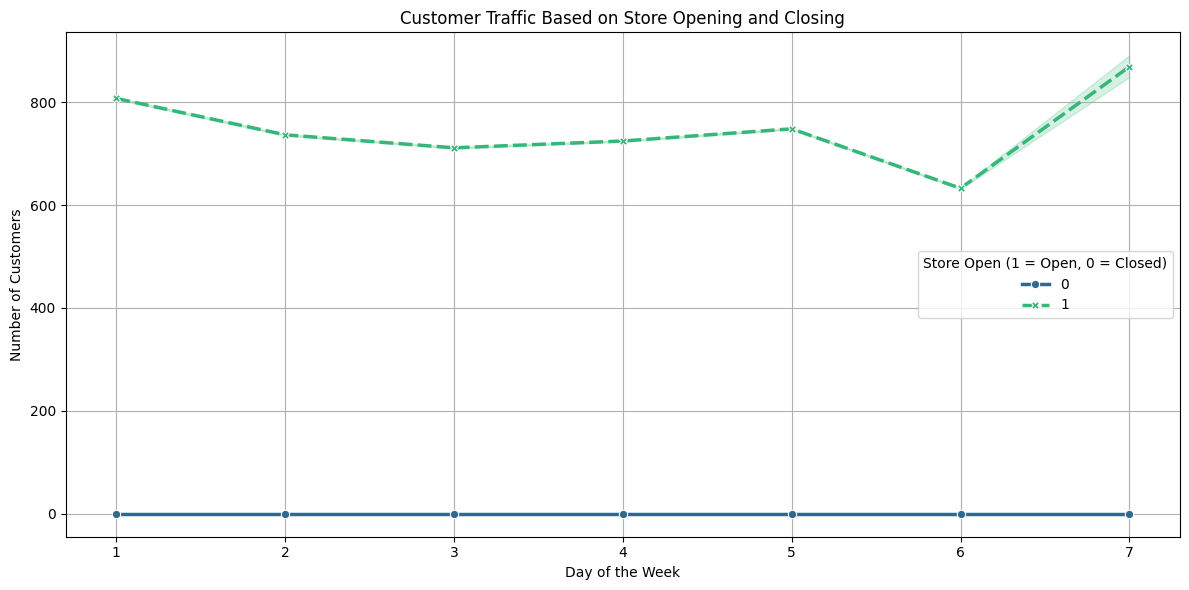

In [12]:
# Customer behavior during opening and closing times
cba.customer_opening_behavior(train_cleaned)

### Step 8: Effect of Competitor Distance on Sales
Let's check how the distance to the nearest competitor affects sales.

2025-01-03 20:12:37 - INFO - Plotting competitor distance vs sales...


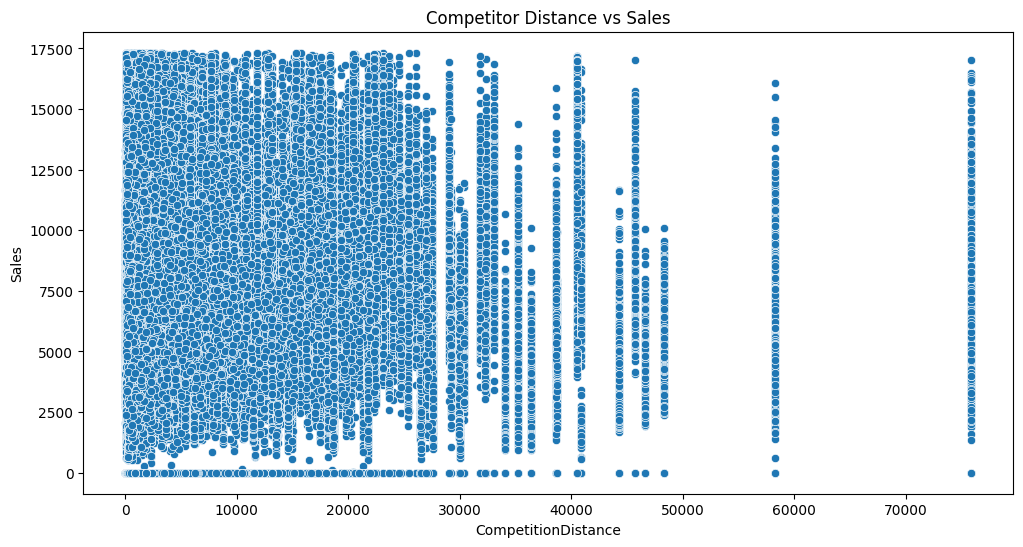

In [23]:
# Scatter plot to check distance vs sales relationship
cba.competitor_distance_sales(train_cleaned)

### Step 9: Assortment Type vs Sales
Lastly, we will explore the effect of assortment type on sales.

2025-01-03 20:42:00 - INFO - Plotting sales based on assortment type...


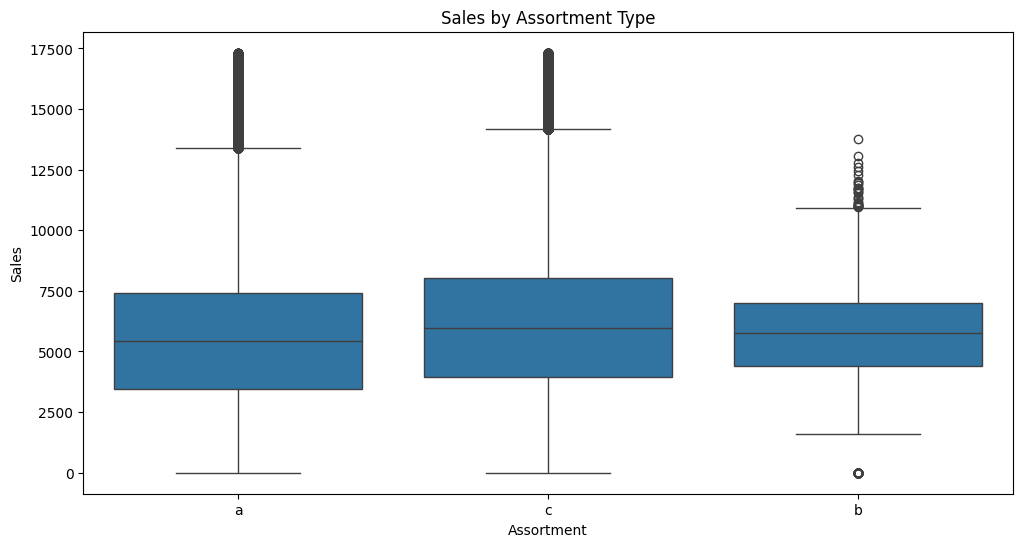

In [12]:
# Plotting sales based on assortment type
cba.assortment_sales(train_cleaned)

2025-01-03 20:44:45 - INFO - Plotting sales before and after competitor entry...


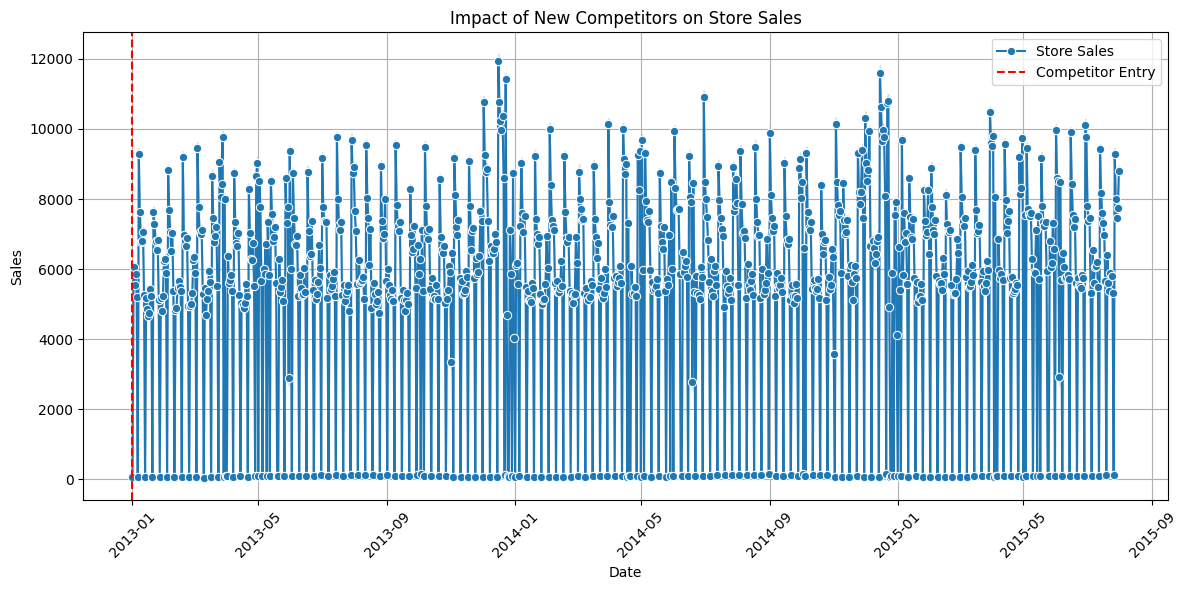

In [12]:
# plot effects of sales befor and after coptitor entry
cba.plot_sales_vs_competitor(train_cleaned)

In [ ]:
# Get the to performing store types
top_stores = cba.get_top_performing_stores(train_cleaned, top_n=4)
top_stores

2025-01-03 20:50:53 - INFO - Identifying top-performing stores...


,StoreType,Sales
0,a,3000255755
3,d,1746115495
2,c,763955718
1,b,60805058


2025-01-03 20:50:55 - INFO - Plotting top-performing stores...


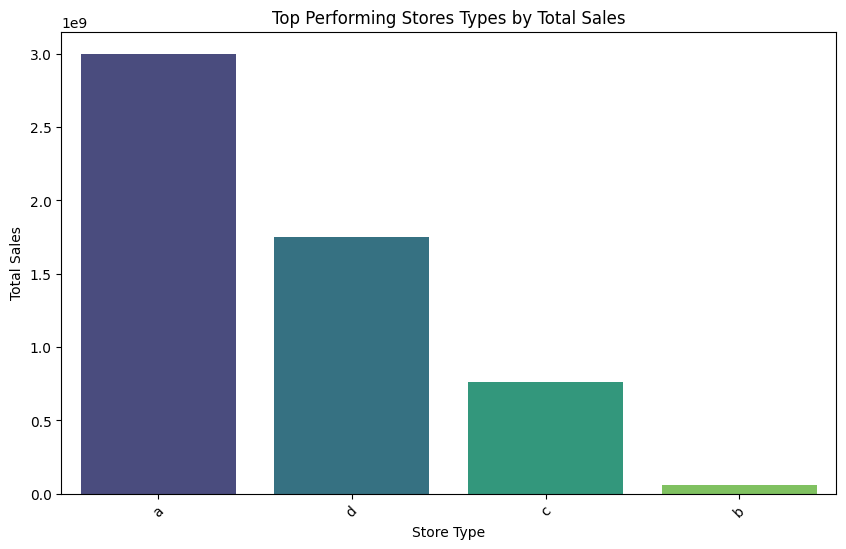

In [14]:
# plot the top performing store types
cba.plot_top_performing_stores(top_stores)

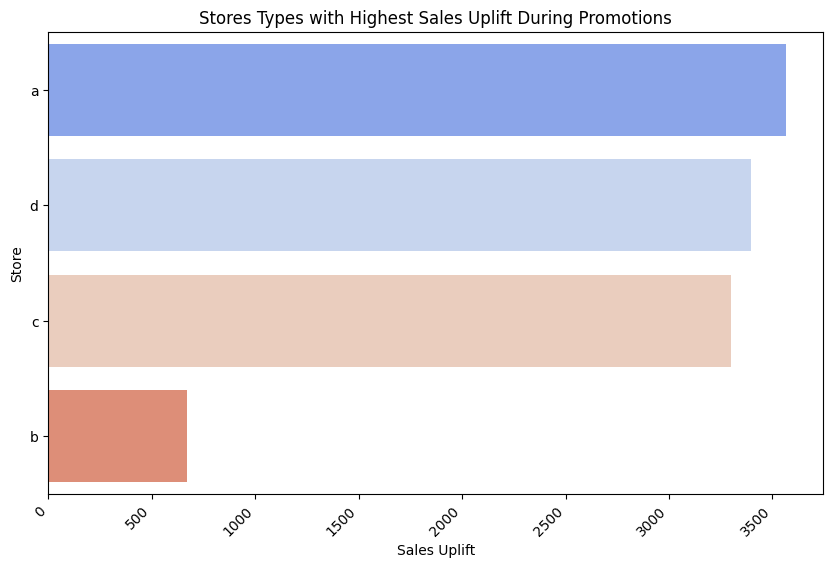

In [12]:
# plot promo effectiveness
cba.analyze_promo_effectiveness(train_cleaned)